<a href="https://colab.research.google.com/github/fsajjads/Labyrinth/blob/main/Cmsc320_FinalProject_AnirudhT_FahimS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CMSC320 Final Project**

**Anirudh Tatavarthi UID: 116543118 and Fahim Sajjad UID: 116013369**

##**💰 Predicting the Amount of Revenue that a Movie will Generate using Machine Learning 💰**

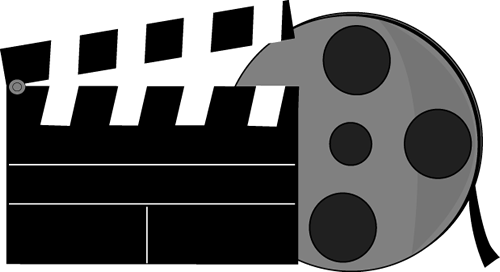



---



**Lights, Camera, Action! 🎥**

It's Friday night and you have just finished a long day of week of work. What's even better is that the premier of the movie you were looking forward to is tonight! You call up a couple of friends, head to the packed movie theater, grab some popcorn, and enjoy the show. 

Most people can relate to this situation. Who doesn't love a good movie? Though everyone enjoy watching films, everyone has their own preferences. Some like watching romance, others enjoy action, and some enjoy the thrill of a horror movie. However, every now and then, there comes a movie that gets everyone you know traveling to the theatres. For example, 'Avatar' and 'Avengers: Endgame' are the two highest grossing films of all time. 

What made these movies so successful? Was it the genre? Was it the cast? Maybe it was the company behind the film? In this project, we will determine the factors behind the generation revenue for various films. Let's find a way to predict how much revenue a film will make.



---



**About the Data ℹ**

This dataset was found on Kaggle. There are two csv files provided. One is a 'train' file and the other is a 'test' file. The train file includes information on over 7,000 movies from "The Movie Database." The test file contains over 4,000 movies but does not include revenue [This is what we will be predicting]. 



---



#**Loading into a pandas dataframe 🐼**

First, lets import the necessary libraries for this project.

In [ ]:
# Load the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Next, we will use panda's read_csv function to read the files into a pandas dataframe to manipulate and visualize the data a lot easier.

There is are two datasets. One for the training data and one for the testing data. For now, we will focus on the training dataset as we will use this information to make sense of what we will use to predict revenue. Later, we will use the test dataset and machine learning algorithms to predict the revenue for each of the movies.

In [ ]:
df_train = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')

display(df_train.head())

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Above, we see the training dataset that we will be using. Looking at the table, we can see a lot of information about each film. We plan to use the budget, popularity, overview, production company, language, title, keyword and analyze their impact on the revenue generated.

Since this dataframe has a lot of columns, let us some clean-up and drop the columns that we will not be using.

In [ ]:
# Drop the unused columns
df_train.drop(['overview', 'spoken_languages', 'homepage', 'imdb_id', 'poster_path', 'release_date', 'tagline', 'status', 'crew', 'production_countries'], axis=1, inplace=True)
df_train.head()

,id,belongs_to_collection,budget,genres,original_language,original_title,popularity,production_companies,runtime,title,Keywords,cast,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",93.0,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",113.0,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",105.0,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,3.174936,NaN,122.0,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,마린보이,1.148070,NaN,118.0,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970




---



#**Analysis of Correlation between Attributes and Revenue 📈 📊**

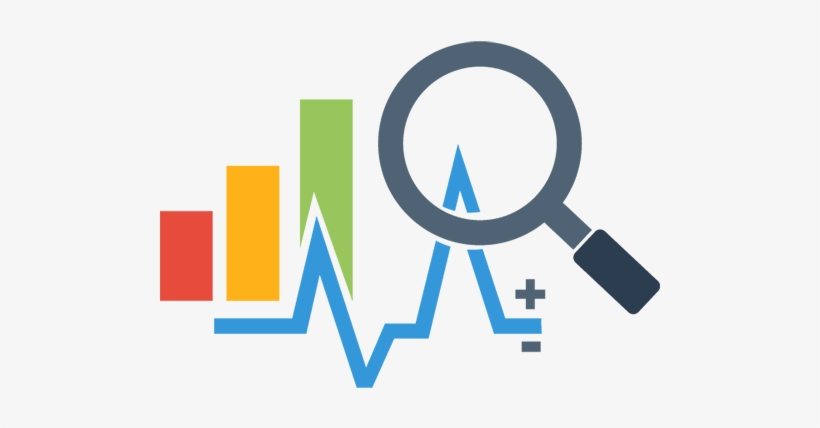



---



**Budget vs. Revenue**

First, let's analyze the correlation between the budget for the movie and the amount of revenue that it generates. We will create a scatter plot with the budget on the x-axis and the revenue on the y-axis. Then, we will plot a regression line to visualize the trend.

We expect for there to be a positive correlation since a higher budget generally relates to higher production quality. More props, better technology, and an expensive crew is more likely to create a more professional final product, which will be entertaining to the audience. For example, if a movie uses top of the line CGI, the audience will feel more immersed and attached to the movie. It will feel as though more effort has been put into the movie, making the audience appreciate it much more.

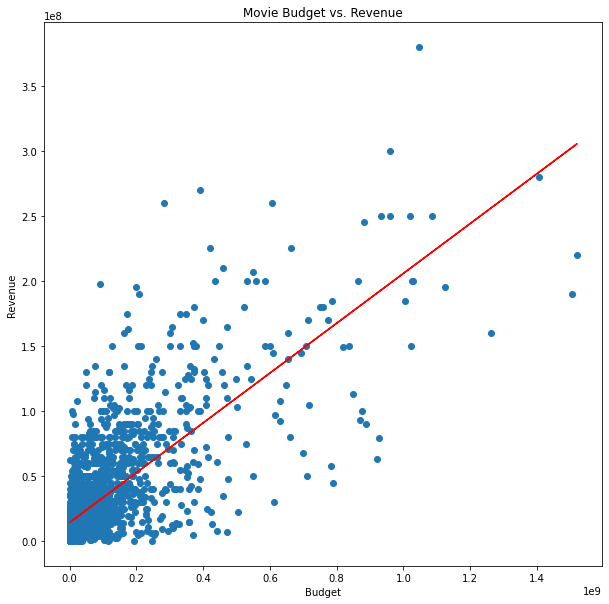

In [ ]:
# Create arrays for us to store revenue and budget information
revenues = []
budgets = []

# Iterate through the dataframe
for index, row in df_train.iterrows():
  # Only include rows where budget information is available
  if row['budget'] > 0:
    # Add the information to the arrays
    revenues.append(row['revenue'])
    budgets.append(row['budget'])

# Create and label the scatterplot
plt.figure(figsize = (10,10))
plt.ylabel('Revenue')
plt.xlabel('Budget')
plt.title("Movie Budget vs. Revenue")
plt.scatter(revenues, budgets)

# Create the regression line
m, b = np.polyfit(revenues, budgets, 1)
fit = np.polyfit(revenues, budgets, 1)
reg_line = np.polyval(fit, revenues)
plt.plot(revenues, reg_line, color = "red")

# Display the plot
plt.show()

Here, we can clearly see a positive correlation between budget and revenue for the movies in this set. This matches our initial assumption made earlier. This is an important factor to note.



---



**Runtime vs. Revenue**

From 30 minute short films to 3 hour long movies filled with content, movies can vary in runtime. Some people may prefer a short movie that gets right to the point. Others may prefer something a bit longer with more character and plot development and a dramatic ending. Nonetheless, it is interesting to study whether runtime has a significant impact on the amount of revenue a movie generates. 

We will do the same of of creating a scatterplot with the x-axis being runtime and the y-axis being revenue. We will plot a line of best fit to observe any relation between runtime and revenue

Let's do some research on what the average movie runtime tends to be. For this, we have found an outside source to help with the information. Let's take a look at this article about movie runtimes written by Przemysław Jarząbek from towardsdatascience.com

https://towardsdatascience.com/are-new-movies-longer-than-they-were-10hh20-50-year-ago-a35356b2ca5b#:~:text=The%20most%20popular%20runtime%20is,is%2080%E2%80%93120%20minutes%20long.

According to this article, the most popular runtime tends to lie between the 90 minute to 100 minute range. On average, most of the movies are between 80 minutes and 120 minutes. Let's see if the data analysis we perform matches the information from this article.

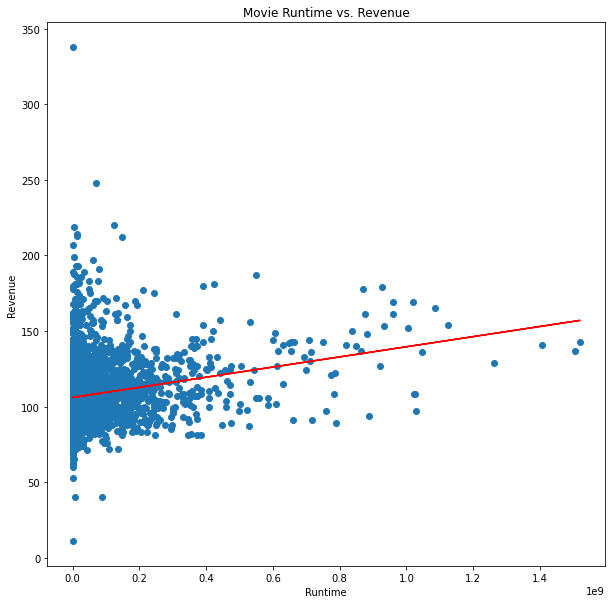

In [ ]:
# Create arrays for us to store revenue and budget information
revenues = []
runtimes = []

# Iterate through the dataframe
for index, row in df_train.iterrows():
  # Only include rows where budget information is available
  if row['runtime'] > 0:
    # Add the information to the arrays
    revenues.append(row['revenue'])
    runtimes.append(row['runtime'])

# Create and label the scatterplot
plt.figure(figsize = (10,10))
plt.ylabel('Revenue')
plt.xlabel('Runtime')
plt.title("Movie Runtime vs. Revenue")
plt.scatter(revenues, runtimes)

# Create the regression line
m, b = np.polyfit(revenues, runtimes, 1)
fit = np.polyfit(revenues, runtimes, 1)
reg_line = np.polyval(fit, revenues)
plt.plot(revenues, reg_line, color = "red")

# Display the plot
plt.show()

Our results are quite interesting. We see that the majority of our data lies in the first quarter of our runtime range. The revenue values are spread apart here much more than the other characteristics that we have studied. However, we do see a slight positive trend. This may mean that with a longer runtime, the audience feels more captivated and engrossed in the film. Longer runtime also gives directors more freedom to add more entertaining scenes and overall add to the production quality of the movie. Wat is interesting to note is that the highest revenue value on this plot is from a movie on the shorter side. This just goes to show that quantity does not always correlate to quality.

**Popularity vs. Revenue**

Next, we will visualize the correlation between the level of popularity of a movie and the revenue. Once again, we will create a scatterplot with a regression line.

We predict that once again, this will result in a positive correlation. A popular movie will lead to more ticket sales. More ticket sales result in more revenue. It's as simple as that!

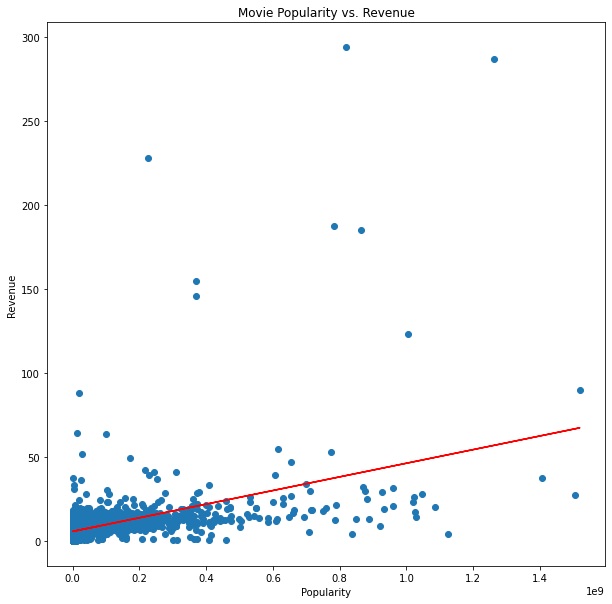

In [ ]:
# Create arrays for us to store revenue and popularity information
revenues = []
popularities = []

# Iterate through the dataframe
for index, row in df_train.iterrows():
  # Add the information to the arrays
  revenues.append(row['revenue'])
  popularities.append(row['popularity'])


# Create and label the scatterplot
plt.figure(figsize = (10,10))
plt.ylabel('Revenue')
plt.xlabel('Popularity')
plt.title("Movie Popularity vs. Revenue")
plt.scatter(revenues, popularities)

# Create the regression line
m, b = np.polyfit(revenues, popularities, 1)
fit = np.polyfit(revenues, popularities, 1)
reg_line = np.polyval(fit, revenues)
plt.plot(revenues, reg_line, color = "red")

# Display the plot
plt.show()

Our assumption was correct once again! By observing this plot, we can see that there is a positive correlation between popularity and revenue. The more people that want to see the movie or are talking about it, the more money it will bring in.



---



**Genre vs. Revenue**

One of the biggest defining characteristics of a movie is its genre. Some genres have a niche audience while other genres are a lot more widely popular.

Lets see if genre of the movie has any effect on the revenue of the movie. In order to see if the genre has any correlation we will calculate the average revenue that was produced by each genre of the movie throughout the years.

We will create a barplot showing the average revenue generated for movies of each of the genres in the dataset. With this information, we can observe whether some genres generate more ticket sales than others. With this information, we can use movie genre as a factor in our prediction of revenue generation for future movies.

Let's see what we find!

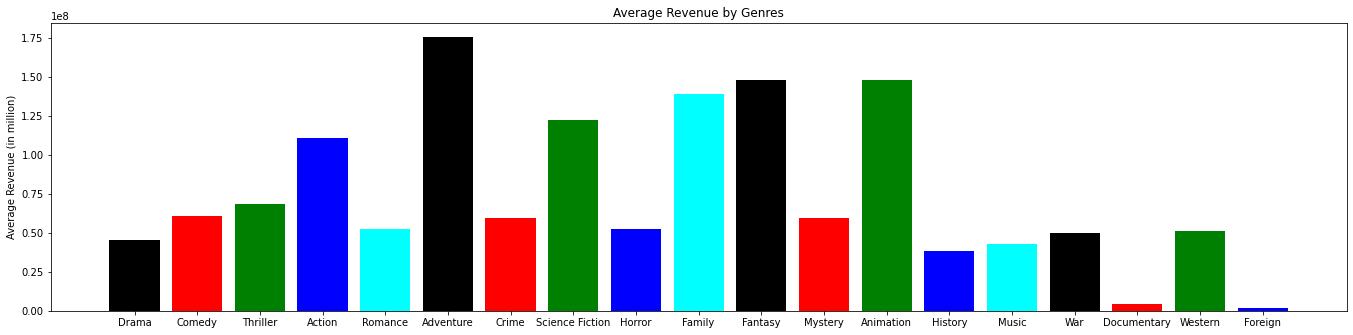

In [ ]:
## better way
genreCount = {"Drama":0, "Comedy": 0, "Thriller" : 0, "Action" : 0, "Romance" : 0, "Adventure" : 0, "Crime" : 0, "Science Fiction" : 0, "Horror":0, "Family" : 0, 
              "Fantasy": 0, "Mystery":0, "Animation" :0, "History" :0, "Music": 0, "War" : 0, "Documentary": 0, "Western": 0, "Foreign": 0}
revCount = {"Drama":0, "Comedy": 0, "Thriller" : 0, "Action" : 0, "Romance" : 0, "Adventure" : 0, "Crime" : 0, "Science Fiction" : 0, "Horror":0, "Family" : 0, 
            "Fantasy": 0, "Mystery":0, "Animation" :0, "History" :0, "Music": 0, "War" : 0, "Documentary": 0, "Western": 0, "Foreign": 0}

def addRevenue(genreName, line, rev):
  if genreName in line:
    genreCount[genreName] += 1
    revCount [genreName] += rev

for index, row in df_train.iterrows():
    genre = str(row['genres'])
    revenue = row['revenue']
    for key in genreCount:
      if key in genre:
        addRevenue(key, genre, revenue)

fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.set_ylabel('Average Revenue (in million)')
ax.set_title('Average Revenue by Genres')
Genres = ['Drama','Comedy','Thriller','Action','Romance','Adventure','Crime','Science Fiction',
                     'Horror','Family','Fantasy','Mystery','Animation','History','Music','War','Documentary',
                     'Western','Foreign']
Average_Revenue = [revCount["Drama"]/genreCount["Drama"], revCount["Comedy"]/genreCount["Comedy"], revCount["Thriller"]/genreCount["Thriller"],
                  revCount["Action"]/genreCount["Action"], revCount["Romance"]/genreCount["Romance"], revCount["Adventure"]/genreCount["Adventure"],
                   revCount["Crime"]/genreCount["Crime"], revCount["Science Fiction"]/genreCount["Science Fiction"], revCount["Horror"]/genreCount["Horror"], 
                  revCount["Family"]/genreCount["Family"], revCount["Fantasy"]/genreCount["Fantasy"], revCount["Mystery"]/genreCount["Mystery"],  
                  revCount["Animation"]/genreCount["Animation"], revCount["History"]/genreCount["History"], revCount["Music"]/genreCount["Music"], 
                   revCount["War"]/genreCount["War"], revCount["Documentary"]/genreCount["Documentary"], revCount["Western"]/genreCount["Western"],
                   revCount["Foreign"]/genreCount["Foreign"]]
ax.bar(Genres,Average_Revenue, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()


Our barplot certainly provides us with some interesting results. We can see that adventure movies, on average, generate the most revenue out of all genres. This makes sense since adventure appeals to all ages and personalities, providing entertainment for a large audience. Next is fantasy and animation. Who doesn't love a good Disney movie? 

We can also observe the genres that do not generate much revenue. For example, documentaries and foreign films tend to perform poorly in the box office. 

Going forward, it would make sense to say that when comparing a crime film and an adventure film, that we would predict the adventure film to make more money. Historical trends would back up this claim.



---



**Language vs. Revenue**

Now let's look at another crucial factor, language. People of all different cultures and languages love movies. However, movies taken in certain languages tend to perform better than others in terms of revenue. In order to figure out which languages bring in the most money, let's make another graph!



This will be a barplot, with the x axis representing the various languages and the y axis representing the average revenue. We will calculate the average revenue generated by movies of each of the languages present in the dataset and present the barplot of the resulting information.

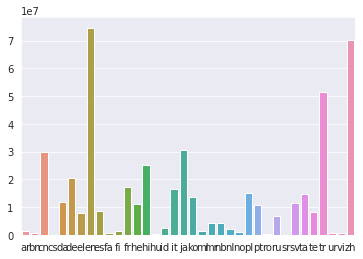

In [ ]:
grouped_data = df_train.groupby('original_language')
grouped_data.get_group("en").revenue.mean()
grouped_data.groups.keys()

average_revenue = list(grouped_data.revenue.mean())
sns.set_style('darkgrid')

lang = list(grouped_data.groups.keys())
sns.barplot(lang, average_revenue)
plt.rcParams['figure.figsize']=(13,13)
plt.show()

**LANGUAGE KEY:**
**(Of the languages with higher revenues)**

* cn: Chinese
* da: Danish
* de: German
* en: English
* fr: French
* hi: Hindi
* ja: Japanese
* tr: Turkish
* zh: Chinese (Another representation)


From our barplot above, we can see the English and Chinese films clearly bring in the most revenue by far. However, if we think about it, this result is not too wild. Our results are put into better perspective after some research. Let's take a look at this article from Berlitz.com

https://www.berlitz.com/en-uy/blog/most-spoken-languages-world

From the article, we learn that there are more English speakers than any other language in the world with 1.132 billion people globally who speak English. The second most spoken language? You guessed it! Mandarin (a dialect of the Chinese language) is spoken by 1.117 billion people around the world.  

Now, we can make better sense of why English and Chinese movies generate the most revenue out of any other movie. There are more people who speak and understand the langugae so the movie has a much wider audience that it can serve. This helps with generating hype and popularity. Once movies in these languages get popular, people who speak different languages may even watch these movies with subtitles.



---



**Heatmap! 🔥**

Our scatterplots and barplots have provided us with some useful visuals of our data. Now, let's create a heatmap to reinforce our observations. 

What are heatmaps? Essentially, heatmaps are a matrix visualization of the correlation between two variables in our dataset. If the correlation is closer to 1 (The more red squares), that means there is a stronger positive relationship between the two variables. If the correlation is closer to -1 (The more blue squares), that means there is a strong negative relationship between two variables.

Let us create our own heatmap and take a look at what we find!

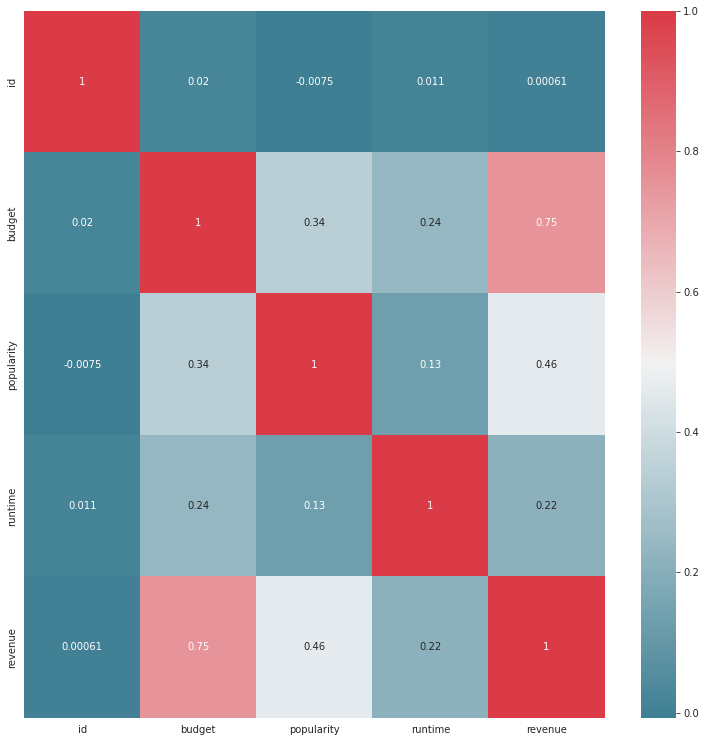

In [ ]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df_train.corr(method = 'pearson'), cmap=cmap, annot = True)

Pretty cool right? Now let's make sense of this heatmap. The first thing you may notice is a diagonal of dark red squares. We can ignore this since that diagonal represents the relationship between a variable and itself. Apart from that, it seems that the strongest positive relationship between two variables in the dataset appears between the budget and revenue categories. The value we get is 0.8, meaning there is a pretty strong indication that as the budget of a movie increases, so does the amount of revenue it generates. 

This concludes our data exploration. Now, let's move on to the machine learning segment of our study!





---



#**Machine Learning to Predict Revenue 🤖**

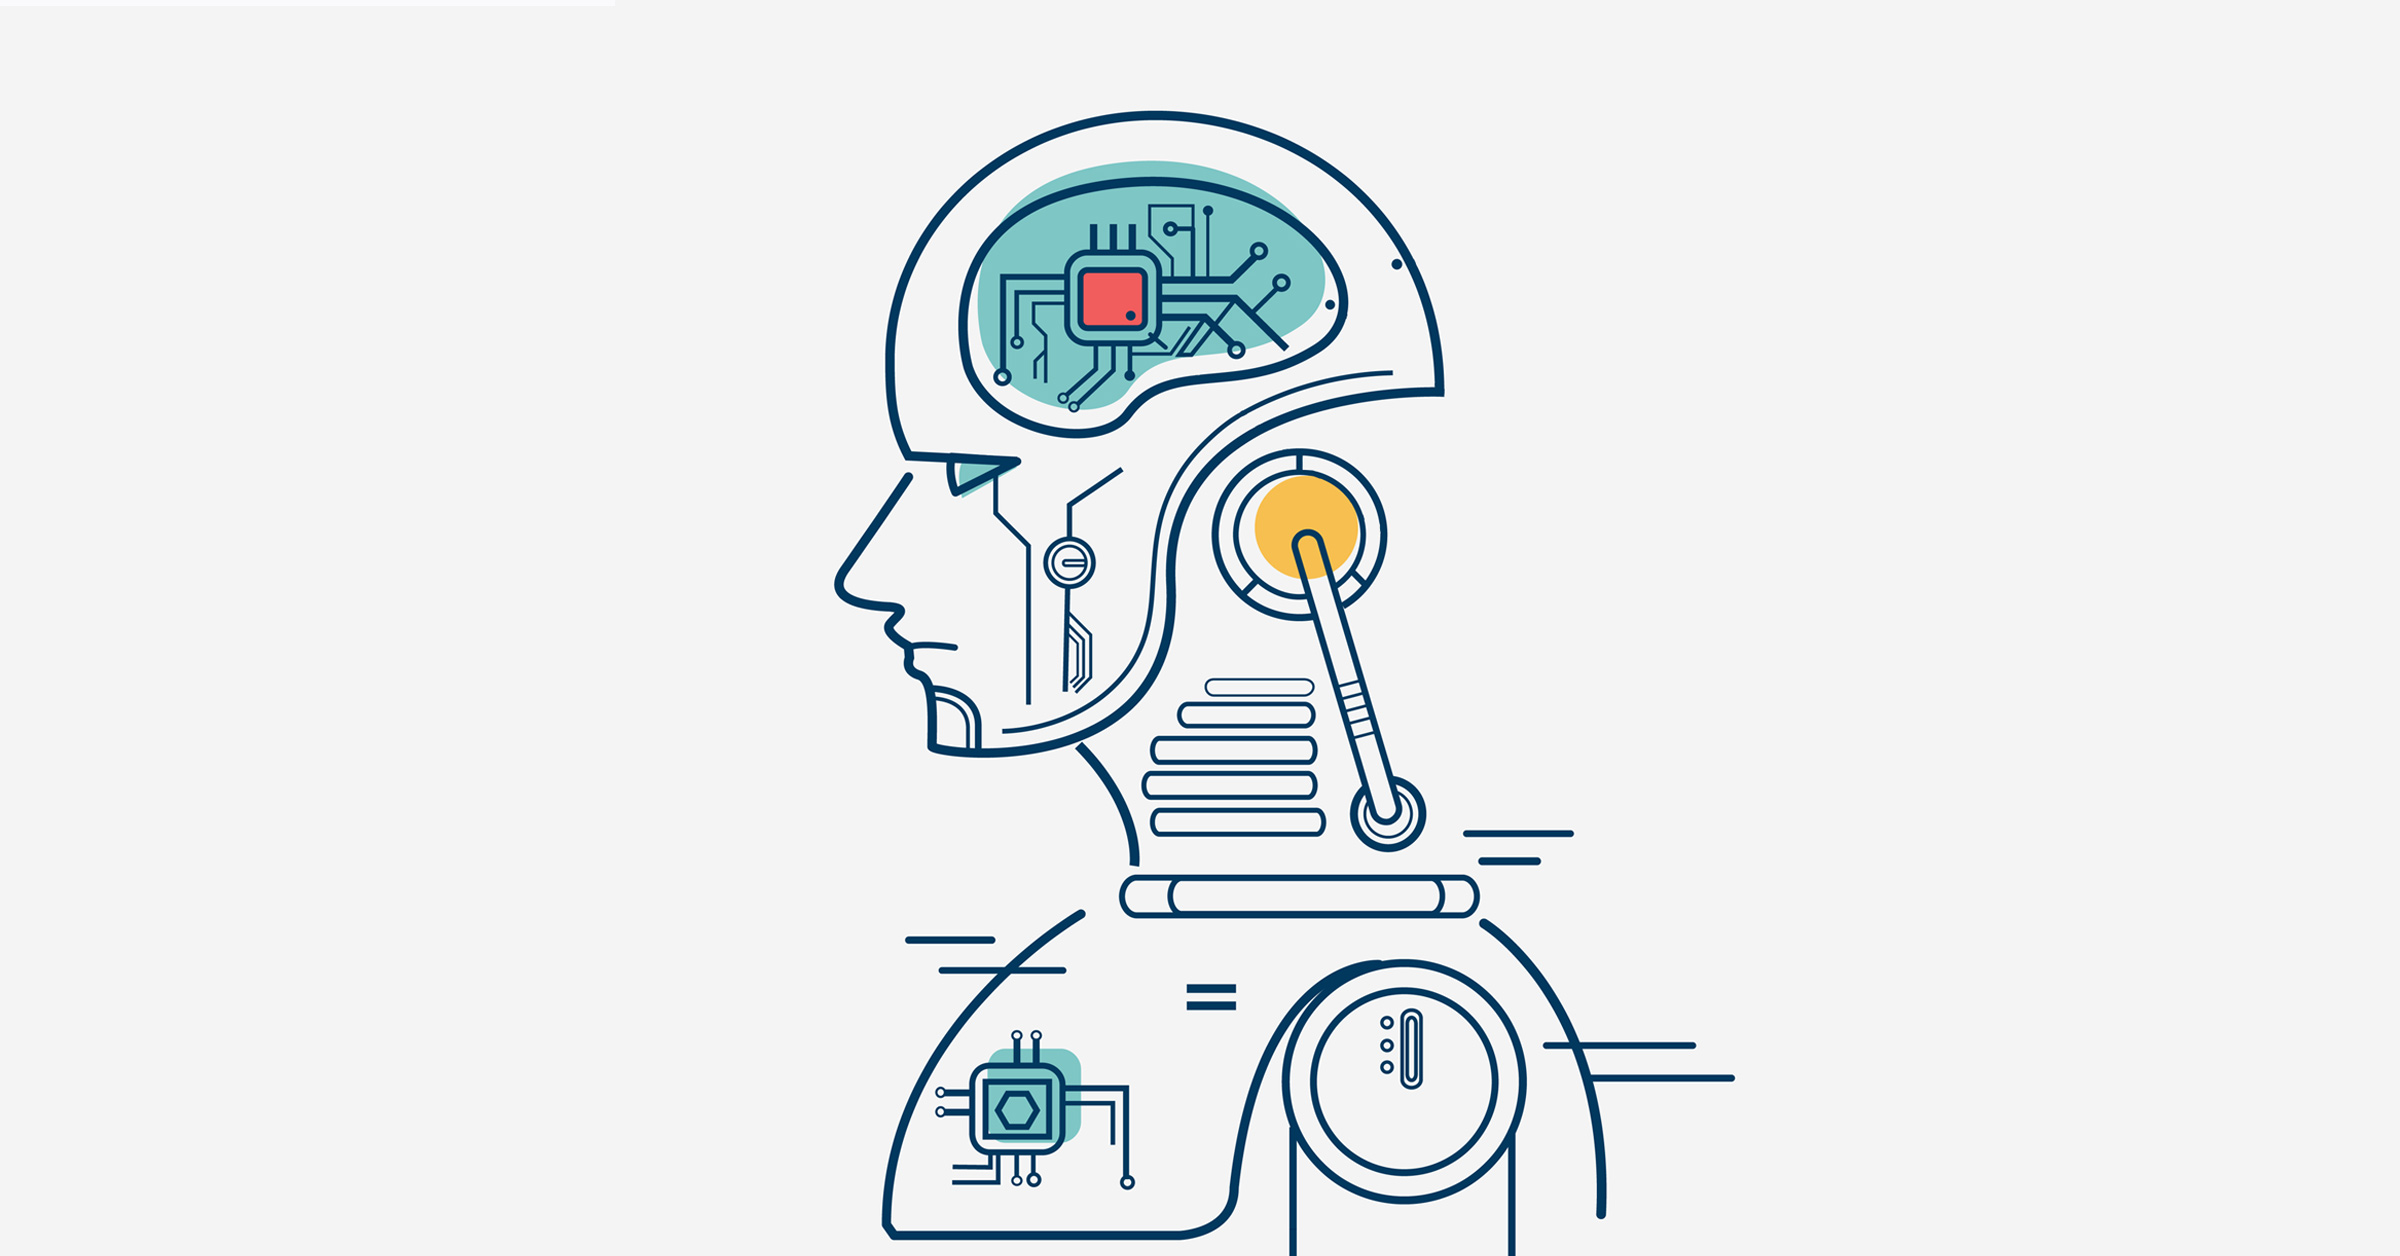

In this part, we want to predict how much revenue a movie going to make by using different types of machine learning models. The three regression models that we decided to use are: LinearRegression, BayesianRidge and GradientBoosting Regressor. We are using multiples models because we want to see which model is more effective at making prediction for potential revenue generated by a movie.

The performance metric that we will be using to measure the 'correctness' of our results is **accuracy**. The accuracy is calcuated by dividing the number of results that we got correct by the total number of predictions. A high accuracy percentage means that our model is making strong predictions, while a low accuracy model means that our model is not very strong at predicting the revenues using the given variables.



---



First, we used Linear Regression model to predict revenue. In order to do that, we first set budget, popularity, and runtime as our features vector and revenue as target/label. Then, we split the data with a ratio of 70% for training and 30% for testing. We then used 10-Fold cross validation to make sure that all the data are equally represented during our prediction process. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#drop all the nan value
df_train.dropna(inplace=True)

# divide the data between features and target
features = df_train[['budget','popularity','runtime']]
target = df_train['revenue']


# split the data for testing and training
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.30)


model = LinearRegression()
model.fit(X_train, y_train)

# used 10 cross validation to divide up the data so that every layer of the data is used and accuracy is improved
pred = model.predict(X_test)
scores = cross_val_score(model, features, target, cv=10)

print( "Linear Regression model's prediction accuracy : ", scores.mean()*100)

Linear Regression model's prediction accuracy :  64.38181941215434


After, predicting the data, we found that the Linear Regression model is 64.381819% accurate at measuring revenue.This value is not very high. Essentially only just over half of our predictions were correct. This may be a problem with the model so let us try out a different model to predict the revenues.



---



Let's move on to the Bayesian Ridge model. We will observe whether it will provide is with a higher accuracy than the Linear Regression model we used above.

In [ ]:
clf= BayesianRidge(compute_score=True)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
scores = cross_val_score(clf, features, target, cv=10)
print( "Bayesian Ridge model's prediction accuracy : ", scores.mean()*100)

Bayesian Ridge model's prediction accuracy :  59.68833154227923


After running our experiment, we find that the Bayesian Ridge model is 59.6883 % accurate at predicting revenue. This is worse than the Linear Regression model. Once again, this is not a good performance. This method of prediction is not reliable, so let us move on once again to the next one.



---



Laslty, we will use the  Gradient Boosting Regression.

In [ ]:
GradientReg = GradientBoostingRegressor(random_state=0)
GradientReg.fit(X_train, y_train)
pred = GradientReg.predict(X_test)
scores = cross_val_score(GradientReg, features, target, cv=10)
print( "GradientBoostingRegressor model's prediction accuracy : ", scores.mean()*100)


GradientBoostingRegressor model's prediction accuracy :  64.53191409647022


**We** find that the Gradient Boosting Regression is about 64.5319140% accurate at predicting revenue.

Out of all the regression models that we used, we found that Gradient Boosting Regressor is the most accurate at predicting revenue, having a 64.5319140% accuracy compard to Linear Regression and Bayesian Regression with 64.3818194% and 59.6883315% respectively.



---



Though our results are not optimal, failing to break higher than a 64% accuracy for our predictions, it is ok. Machine learning does not always work for every problem that we are trying to solve. Perhaps the variables we used to predict were not quite strong enough to provide the models with enough information to make accurate predictions. It may be true that with some tweaks to our process, we can start producing more accurate predictions. This just shows us the complexity of machine learning and the level of detail that one must pay attention to in order to produce quality results.



---



#**Conclusion 🎥**

Well, there we have it! Using our dataset containing characteristics of thousands of previous movies, we were able to analyze how accurate some of the machine learning models we used were able to get. We explored the relationship between numerous categorical and qualitative variables and the amount of revenue generated by a movie, and made some pretty cool discoveries.

What can we do with this information? Through studies like this, movie production companies in the future can learn how to maximize the revenue generated by a movie. Through our data exploration, we learned that a relatively long, adventurous, English movie with a high budget, and large fanbase can result in the highest number of ticket sales. Now of course, film making is about passion and art, and not necessarily about making as much money as possible. This being said, film-makers can still learn how to make a pretty penny off of their cinematic masterpiece. 

Our study also shows us the usefulness of data analysis, visualization, and machine learning. With the abundant amounts of information that is available to us today, being able to use the data to draw conclusions which would result in one's advantage is a very powerful skill. This can be applied to any area and as long as data keeps coming in, the possibilities are truly endless! 



Roll credits!

**CHECKLIST**
* clean up explanation in data analysis
* clean up and add explanation to ML
* explain heatmap ✅
* conclusion ✅
* do an overall check